In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### playing with wavedump1 decoding

In [23]:
file_path = 'test_dir/wave1.dat'

with open(file_path, 'rb') as file:
    header = np.fromfile(file, dtype = 'i', count = 6)

print(header)

[  284     0     0     1     0 44253]


In [24]:
def read_data_lazily(file):

    while True:
        header = np.fromfile(file, dtype = 'i', count = 6)
        print(header)
        if len(header) == 0:
            print("Finished processing...")
            return

        header[0] = header[0] - 24

        event_size = header[0] // 2

        data = np.fromfile(file, dtype = np.dtype('<H'), count = event_size)        
        yield data

[  284     0     0     1     0 44253]
[7707 7703 7701 7709 7700 7699 7705 7702 7708 7702 7708 7694 7709 7703
 7702 7707 7700 7709 7695 7707 7704 7714 7694 7710 7700 7708 7704 7701
 7706 7693 7711 7698 7706 7697 7716 7696 7705 7697 7705 7703 7702 7708
 7695 7713 7697 7705 7699 7707 7709 7698 7706 7698 7716 7693 7709 7700
 7705 7707 7704 7699 7703 7712 7698 7701 7700 7706 7697 7708 7703 7698
 7703 7705 7703 7695 7706 7700 7706 7703 7704 7702 7701 7702 7710 7710
 7701 7711 7700 7698 7703 7705 7699 7702 7703 7707 7698 7707 7702 7700
 7705 7703 7697 7706 7703 7699 7704 7710 7699 7699 7702 7707 7699 7709
 7704 7702 7697 7709 7704 7706 7713 7699 7705 7702 7707 7701 7705 7700
 7707 7704 7705 7701]
0
[   284      0      0      1      1 169253]
[7701 7700 7706 7704 7703 7711 7699 7709 7702 7708 7700 7713 7705 7699
 7709 7699 7709 7703 7700 7699 7713 7704 7698 7707 7705 7701 7705 7706
 7707 7703 7705 7695 7702 7704 7711 7698 7708 7709 7698 7707 7699 7710
 7695 7708 7703 7710 7695 7708 7706 7700 7

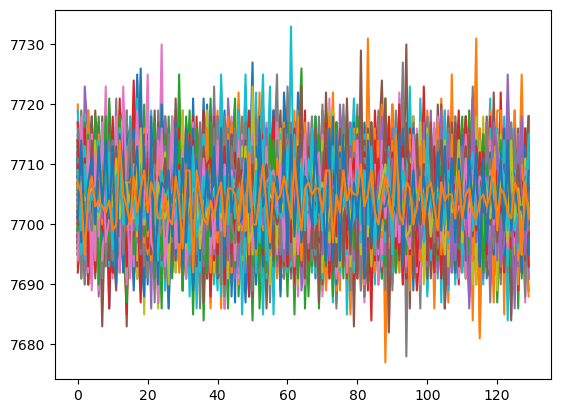

In [27]:
with open(file_path, 'rb') as file:
    
    for i, piece in enumerate(read_data_lazily(file)):
        print(piece)
        print(i)
        # stick your processing in here I guess ;P
        plt.plot(piece)
        if i > 1000:
            break